# 문제 #1.


> 연봉 데이터를 불러들여 2015년 데이터만 "salary15"에 저장하고 (행=개체, 열=변수)크기를 출력하시오. (817X5)

> 타자 데이터를 불려들러 2015년 데이터만 "batting15"에 저장하시오. (행=개체, 열=변수)크기를 출력하시오. (1486X22)





In [0]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
Salaries=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Salaries.csv')
salary15 = Salaries[Salaries.yearID==2015]
print(salary15.shape)
import pandas as pd
Batting=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Batting.csv')
Batting15 = Batting[Batting.yearID==2015]
print(Batting15.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(817, 5)
(1486, 22)


# 문제 #2.


> salary15 데이터프레임과 batting15 데이터프레임을 "playerID"에 의해 결합하고 "salary_bat"에(918X26) 저장하시오. 그리고 다음 함수를 사용하여 중복 데이터를 제거한 후 'sb_df'에 저장하시오(816X26).


>sb_df=salary_bat.drop_duplicates(['playerID'])




In [0]:
salary_bat = pd.merge(salary15,Batting15,how='inner',on='playerID')
sb_df=salary_bat.drop_duplicates(['playerID'])

# 문제 #3.


> 2015년 MLB 선수(sb_df데이터 사용) 연봉 평균(mean)과 중앙값(median)을 출력하시오.



In [0]:
print('평균=',sb_df.salary.mean(),'중앙값',sb_df.salary.median())

평균= 4303483.540441177 중앙값 1865000.0


# 문제4.


> 2015년 MLB 선수 연봉에 대한 Kernel Density estimate plot을 그리고 해석하시오.



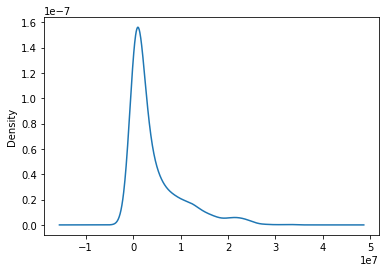

In [0]:
sb_df.salary.plot.kde()

# 문제5.


> 위의 커널확률밀도함수를 해석하시오.

오른쪽으로 꼬리가 긴 모양을 나타낸다.

# 문제6.


> 'sb_df' 데이터프레임에서 teamID_x(연봉 데이터와 배팅 데이터에 teamID 변수명이 중복되어 앞의 것은 teamID_x, 뒤에 것은 team_ID_y로 저장되어 있음) 별 연봉 평균을 구하시오. 

In [0]:
teamID_mean = sb_df.groupby('teamID_x')['salary'].mean()
teamID_mean

teamID_x
ARI    2.132207e+06
ATL    2.990885e+06
BAL    4.108744e+06
BOS    5.659481e+06
CHA    4.161989e+06
CHN    4.138547e+06
CIN    4.187862e+06
CLE    3.022888e+06
COL    3.827544e+06
DET    6.891390e+06
HOU    2.580579e+06
KCA    4.152112e+06
LAA    4.444645e+06
LAN    7.441103e+06
MIA    2.835688e+06
MIL    3.477586e+06
MIN    4.310200e+06
NYA    7.336274e+06
NYN    3.870667e+06
OAK    2.823339e+06
PHI    4.367720e+06
PIT    3.065259e+06
SDN    4.555435e+06
SEA    4.888348e+06
SFN    6.100056e+06
SLN    4.586212e+06
TBA    2.224870e+06
TEX    4.791426e+06
TOR    4.519696e+06
WAS    5.365085e+06
Name: salary, dtype: float64

# 문제7.


> Team 중 연봉이 가장 높은 팀과 가장 낮은 팀을 적으시오. (6번 결과 값을 보고 판단하여도 되나? 결과를 저장한 후 코드 사용하여 출력하면 가산점 있음)

In [0]:
teamID_mean.max()
teamID_mean.min()

print('가장 높은 팀 = LAN, 가장 낮은 팀 = ARI')

가장 높은 팀 = LAN, 가장 낮은 팀 = ARI


# 문제8.


> 'sb_df' 데이터에서 5% 데이터만 랜덤 추출하여 'sample' 데이터 프레임으로 저장하시오. (~,test_size=???, random_state=919) 사용 - 동일값을 얻는다.

In [0]:
from sklearn.model_selection import train_test_split
sample_data, X_test = train_test_split(sb_df, test_size = 0.95, random_state=919)
print(sample_data.shape,'***',X_test.shape)

(40, 26) *** (776, 26)


# 문제9.


> sample 데이터를 이용하여 MLB 2015년 선수 연봉에 대한 95% 신뢰구간을 구하시오.

In [0]:
import math
print('신뢰구간 하한=',sample_data.salary.mean()-1.96*sample_data.salary.std()/math.sqrt(40),'상한=',sample_data.salary.mean()+1.96*sample_data.salary.std()/math.sqrt(40))

신뢰구간 하한= 2418940.6269424036 상한= 5321398.223057596


# 문제10.

> 문제3에서 구한 2015년 선수 전체 평균이 신뢰구간 안에 있는가? 


> 있다면 혹은 없다면 이것은 무엇을 의미하는가?

(기술)



문제3에서 구한 2015년 선수 전체 평균은 4303483.540441177으로 신뢰구간 안에 포함되어 있습니다. 즉, 표본은 95% 신뢰할 수 있습니다.